 ## <span style='color:orange'> Moving Average Cross-over Strategy  </span> 
-  ## Lets apply this strategy to a forex pair of EUR/USD to predict bullish and bearish nature


### Steps
-  Download Historical data - YahooFinance
-  Calculate Moving averages
-  Generate BuySell condition
-  Plot actual price and moving averages along with signals


[*********************100%%**********************]  1 of 1 completed


C:\Users\anee2\AppData\Local\Temp\ipykernel_28608\552222009.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][10:] = np.where(data['10_day_MA'][10:] > data['50_day_MA'][10:], 1.0, 0.0)


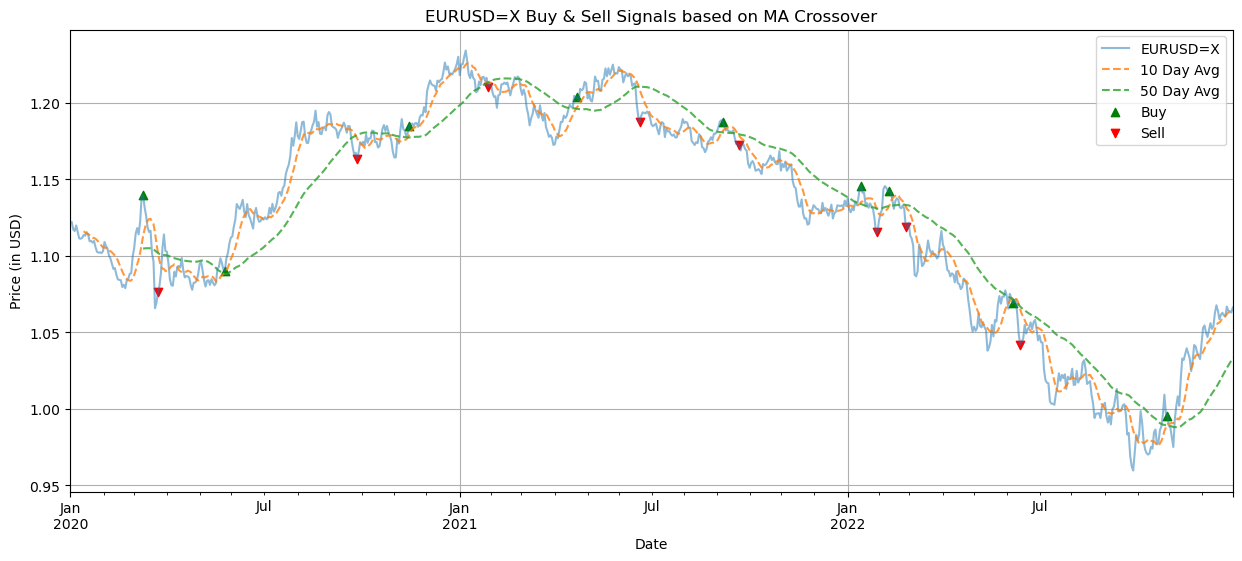

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Extract data
ticker = "EURUSD=X"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

#Calculate moving averages
data['10_day_MA'] = data['Close'].rolling(window=10).mean()
data['50_day_MA'] = data['Close'].rolling(window=50).mean()

#Create Buy/Sell signals
data['Signal'] = 0.0
data['Signal'][10:] = np.where(data['10_day_MA'][10:] > data['50_day_MA'][10:], 1.0, 0.0)   
data['Position'] = data['Signal'].diff()

#Identify buy/sell signals
buy_signals = data[data['Position'] == 1.0]
sell_signals = data[data['Position'] == -1.0]

#Plot the data and moving averages
plt.figure(figsize=(15, 6))
data['Close'].plot(label=ticker, alpha=0.5)
data['10_day_MA'].plot(label='10 Day Avg', linestyle='--', alpha=0.8)
data['50_day_MA'].plot(label='50 Day Avg', linestyle='--', alpha=0.8)
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell', alpha=1)
plt.title(f"{ticker} Buy & Sell Signals based on MA Crossover")
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.grid()
plt.show()
